In [1]:
#importation of the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the dataset and displaying the first 3 rows of the dataset inclusive of the columns
df=pd.read_csv("fraud_detection_data.csv")
df.head(3)

,TransactionID,TransactionAmount,MerchantID,UserID,TransactionTime,FraudIndicator,TransactionType,Location,TransactionFrequency,MerchantFrequency,TransactionHour
0,1,374602.6648,43,1087,01/01/2023 0:00,0,Online,Rural,7,1,0
1,2,950719.2350,8,1011,01/01/2023 1:00,0,Online,Rural,3,0,1
2,3,732020.7424,13,1062,01/01/2023 2:00,0,In-store,Suburb,8,7,2


In [3]:
df.shape

(8737, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         8737 non-null   int64  
 1   TransactionAmount     8563 non-null   float64
 2   MerchantID            8737 non-null   int64  
 3   UserID                8737 non-null   int64  
 4   TransactionTime       8737 non-null   object 
 5   FraudIndicator        8737 non-null   int64  
 6   TransactionType       8737 non-null   object 
 7   Location              8737 non-null   object 
 8   TransactionFrequency  8737 non-null   int64  
 9   MerchantFrequency     8737 non-null   int64  
 10  TransactionHour       8737 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 751.0+ KB


In [5]:
#Convert the datatype of TransactionTime into datetime
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TransactionID         8737 non-null   int64         
 1   TransactionAmount     8563 non-null   float64       
 2   MerchantID            8737 non-null   int64         
 3   UserID                8737 non-null   int64         
 4   TransactionTime       8737 non-null   datetime64[ns]
 5   FraudIndicator        8737 non-null   int64         
 6   TransactionType       8737 non-null   object        
 7   Location              8737 non-null   object        
 8   TransactionFrequency  8737 non-null   int64         
 9   MerchantFrequency     8737 non-null   int64         
 10  TransactionHour       8737 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 751.0+ KB


In [7]:
# check for duplicates in our dataset
df.duplicated().sum()

0

In [8]:
#Check for unique values
df.nunique()

TransactionID           8737
TransactionAmount       8563
MerchantID               100
UserID                   100
TransactionTime         8737
FraudIndicator             2
TransactionType            2
Location                   3
TransactionFrequency      15
MerchantFrequency         13
TransactionHour           24
dtype: int64

In [9]:
# Investigate the missing data
df.isna().sum()

TransactionID             0
TransactionAmount       174
MerchantID                0
UserID                    0
TransactionTime           0
FraudIndicator            0
TransactionType           0
Location                  0
TransactionFrequency      0
MerchantFrequency         0
TransactionHour           0
dtype: int64

In [10]:
# checking for the percentage of the null values
def formatt(x):
    return '{:.2f}%'.format(x)
((df.isnull().sum()/len(df))*100).apply(formatt)

TransactionID           0.00%
TransactionAmount       1.99%
MerchantID              0.00%
UserID                  0.00%
TransactionTime         0.00%
FraudIndicator          0.00%
TransactionType         0.00%
Location                0.00%
TransactionFrequency    0.00%
MerchantFrequency       0.00%
TransactionHour         0.00%
dtype: object

In [11]:
df.dropna(inplace = True)

In [12]:
df.isna().sum()

TransactionID           0
TransactionAmount       0
MerchantID              0
UserID                  0
TransactionTime         0
FraudIndicator          0
TransactionType         0
Location                0
TransactionFrequency    0
MerchantFrequency       0
TransactionHour         0
dtype: int64

## Summary Statistics

In [13]:
#Desciptive statistics of the dataset
df.describe()

,TransactionID,TransactionAmount,MerchantID,UserID,FraudIndicator,TransactionFrequency,MerchantFrequency,TransactionHour
count,8563.000000,8.563000e+03,8563.000000,8563.000000,8563.000000,8563.000000,8563.000000,8563.000000
mean,4369.065047,5.290190e+05,50.106388,1050.513138,0.019736,4.999299,2.991008,11.514306
std,2521.606404,4.976157e+05,28.744434,28.984670,0.139100,2.222025,1.731859,6.913547
min,1.000000,1.116336e+02,1.000000,1001.000000,0.000000,0.000000,0.000000,0.000000
25%,2187.500000,2.467054e+05,25.000000,1025.000000,0.000000,3.000000,2.000000,6.000000
50%,4372.000000,4.963091e+05,50.000000,1051.000000,0.000000,5.000000,3.000000,12.000000
75%,6552.500000,7.509303e+05,75.000000,1076.000000,0.000000,6.000000,4.000000,18.000000
max,8737.000000,8.433048e+06,100.000000,1100.000000,1.000000,14.000000,14.000000,23.000000


In [14]:
#Desciptive statistics of the categorical variables 
df.describe(include=["object", "bool"])

,TransactionType,Location
count,8563,8563
unique,2,3
top,Online,Suburb
freq,4308,2877


##### insights:
- the datasets has 8737 entries
- no duplicates entries
- transaction amount has about 1.99% missing values



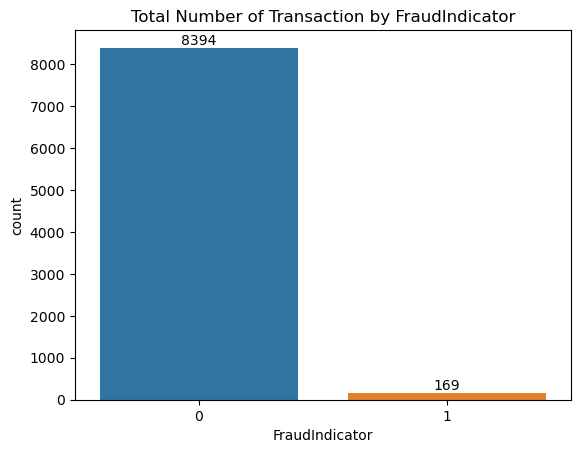

In [15]:
# Compare Total Transaction by FraudIndicator
ax = sns.countplot(x=df["FraudIndicator"], order=df["FraudIndicator"].value_counts(ascending=False).index)
values = df["FraudIndicator"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title('Total Number of Transaction by FraudIndicator');

##### insight:
we have 169 fraudulent transactions and 8394 non-fraudulent transactions

<AxesSubplot: ylabel='FraudIndicator'>

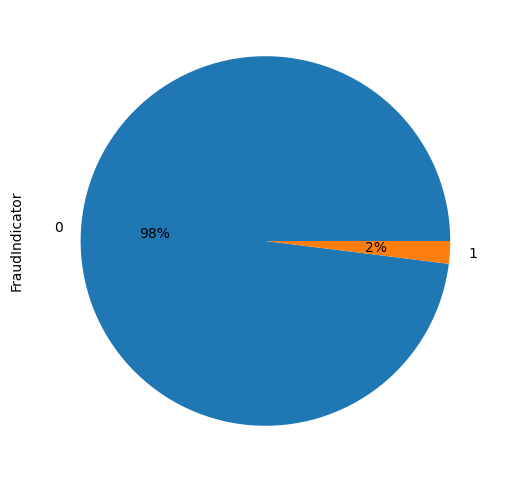

In [16]:
# Plot a Pie Chart for FraudIndicator
df['FraudIndicator'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6, 6))

<AxesSubplot: ylabel='Location'>

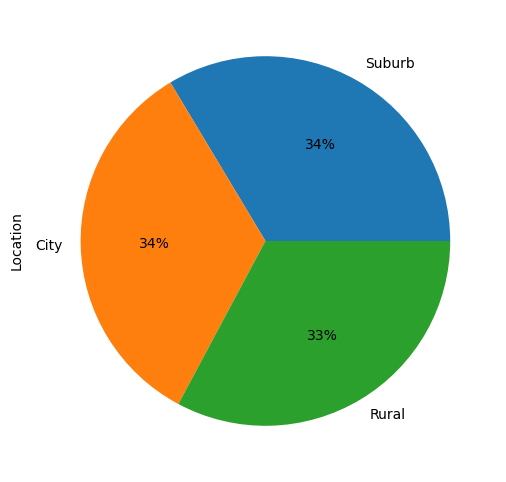

In [17]:
# Plot a Pie Chart for Failure Indicator
df['Location'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6, 6))

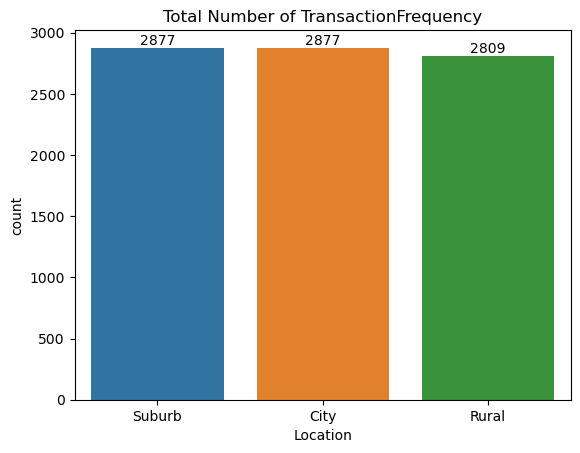

In [18]:
ax = sns.countplot(x=df["Location"], order=df["Location"].value_counts(ascending=False).index)
values = df["Location"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title('Total Number of TransactionFrequency');

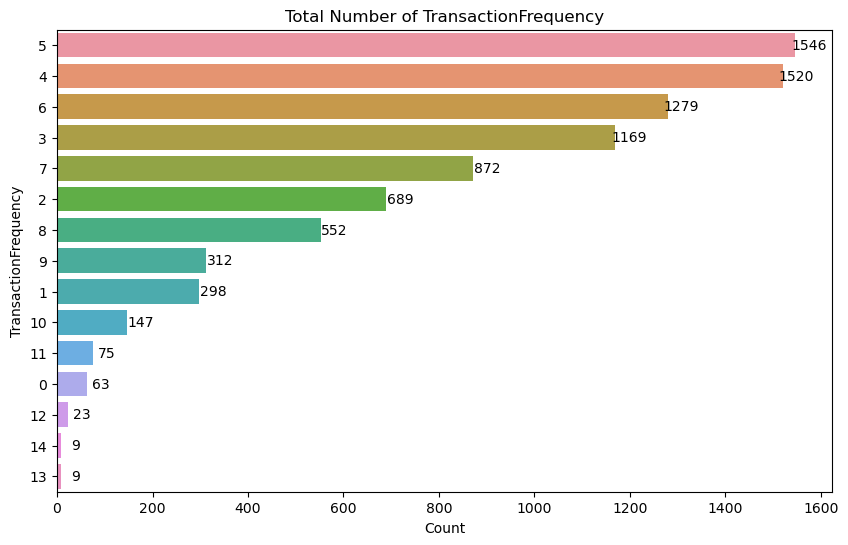

In [19]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a horizontal countplot
ax = sns.countplot(y=df["TransactionFrequency"], order=df["TransactionFrequency"].value_counts(ascending=False).index)

# Annotate bars with their counts
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha = 'center', va = 'center', 
                xytext = (10, 0), 
                textcoords = 'offset points')

plt.title('Total Number of TransactionFrequency')
plt.xlabel('Count')
plt.ylabel('TransactionFrequency')

plt.show()

#####  insight:
this show the counts of different transaction frequencies in the dataset

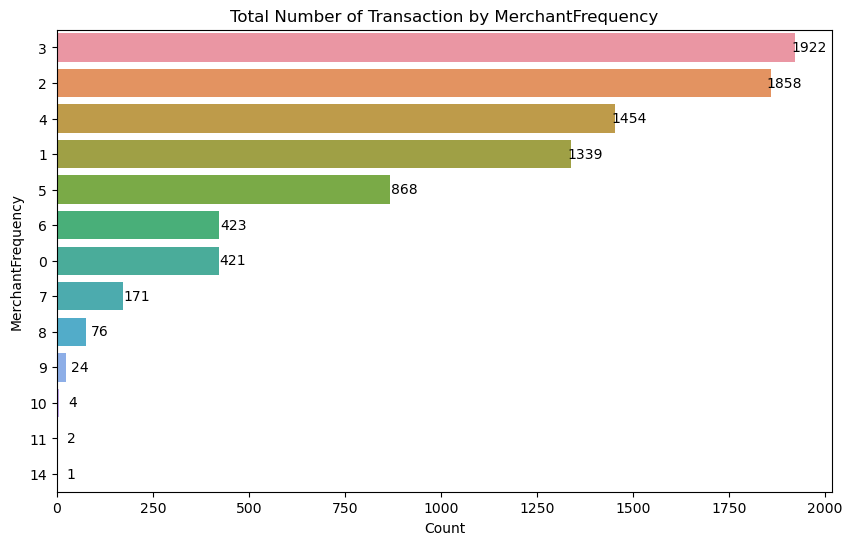

In [20]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a horizontal countplot
ax = sns.countplot(y=df["MerchantFrequency"], order=df["MerchantFrequency"].value_counts(ascending=False).index)

# Annotate bars with their counts
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha = 'center', va = 'center', 
                xytext = (10, 0), 
                textcoords = 'offset points')

plt.title('Total Number of Transaction by MerchantFrequency')
plt.xlabel('Count')
plt.ylabel('MerchantFrequency')

plt.show()

##### insight:
this horizontal bar plot displays the count of different merchant frequencies in the dataset,

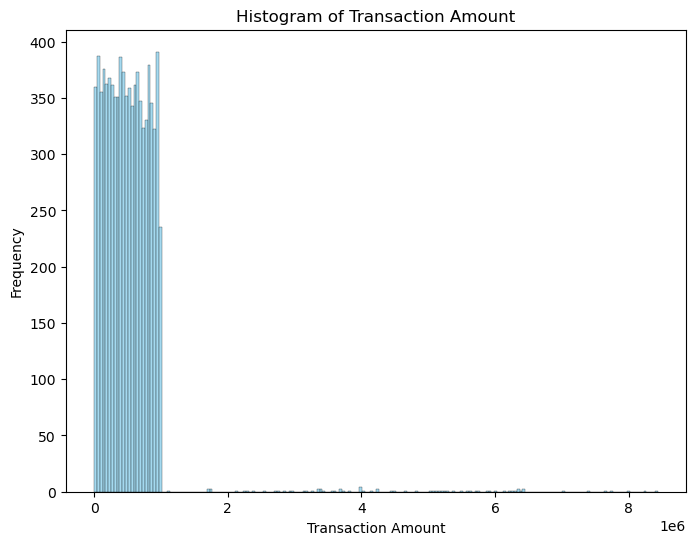

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TransactionAmount'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount')
plt.show()

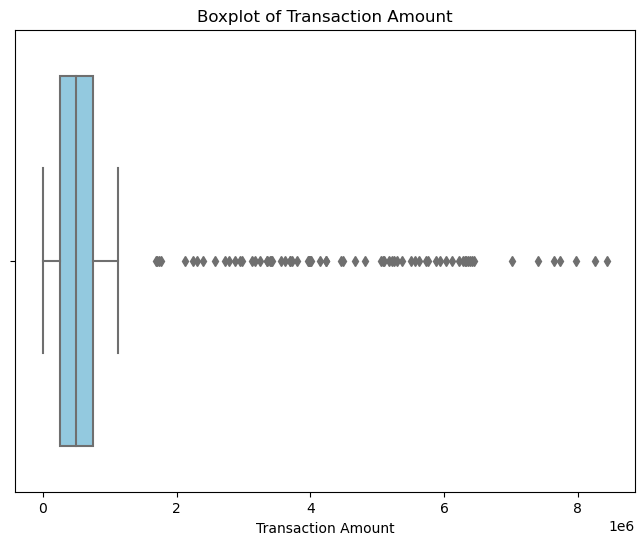

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='TransactionAmount', data=df, color='skyblue')
plt.xlabel('Transaction Amount')
plt.title('Boxplot of Transaction Amount')
plt.show()

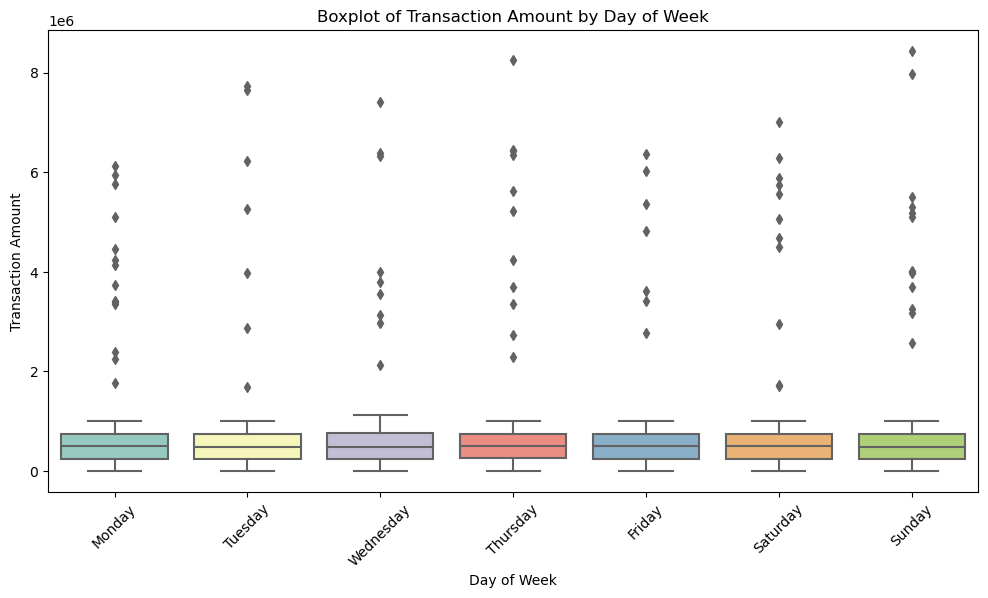

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['TransactionTime'].dt.dayofweek, y=df['TransactionAmount'], palette='Set3')
plt.xlabel('Day of Week')
plt.ylabel('Transaction Amount')
plt.title('Boxplot of Transaction Amount by Day of Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()

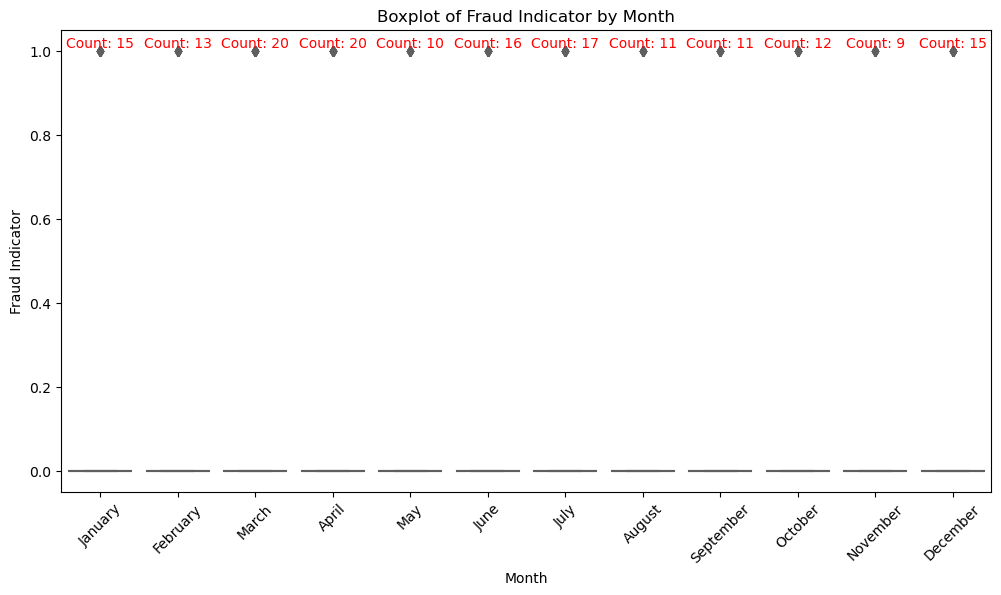

In [25]:
# Calculate counts of fraud per month

fraud_counts_per_month = df[df['FraudIndicator'] == 1].groupby(df['TransactionTime'].dt.month).size()


plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df['TransactionTime'].dt.month, y=df['FraudIndicator'], palette='Set3')

# Display counts of fraud per month as text on the plot
for i, count in enumerate(fraud_counts_per_month):
    ax.text(i, 1, f'Count: {count}', ha='center', va='bottom', fontsize=10, color='red')

plt.xlabel('Month')
plt.ylabel('Fraud Indicator')
plt.title('Boxplot of Fraud Indicator by Month')
plt.xticks(ticks=range(0, 12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.show()

Total counts of '1' (Fraudulent): 169
Total counts of '0' (Non-fraudulent): 8394


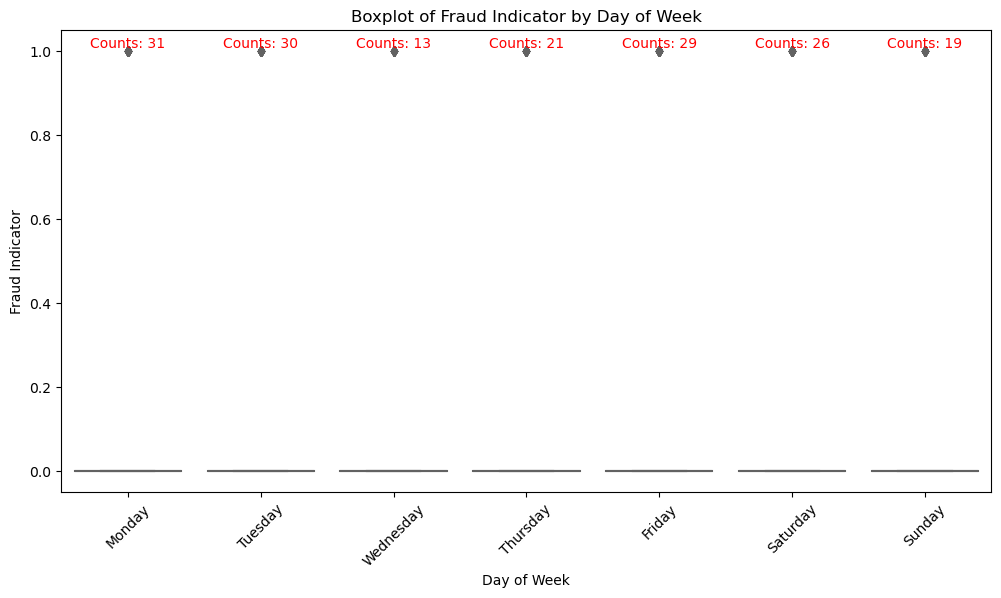

In [26]:
# Calculate counts of fraud per day of the week
fraud_counts = df['FraudIndicator'].value_counts()

# Print the counts
print("Total counts of '1' (Fraudulent):", fraud_counts[1])
print("Total counts of '0' (Non-fraudulent):", fraud_counts[0])

fraud_counts_per_day = df[df['FraudIndicator'] == 1].groupby(df['TransactionTime'].dt.dayofweek).size()

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df['TransactionTime'].dt.dayofweek, y=df['FraudIndicator'], palette='Set3')

# Display counts of fraud per day of the week as text on the plot
for i, count in enumerate(fraud_counts_per_day):
    ax.text(i, 1, f'Counts: {count}', ha='center', va='bottom', fontsize=10, color='red')

plt.xlabel('Day of Week')
plt.ylabel('Fraud Indicator')
plt.title('Boxplot of Fraud Indicator by Day of Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()


Total counts of '1' (Fraudulent): 169
Total counts of '0' (Non-fraudulent): 8394


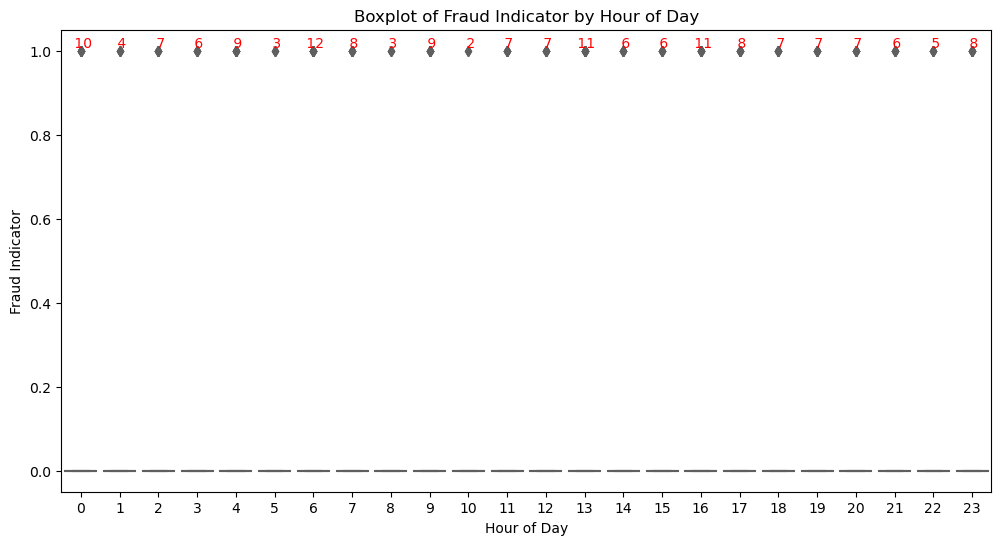

In [27]:
# Calculate counts of fraud per day of the week
fraud_counts = df['FraudIndicator'].value_counts()

# Print the counts
print("Total counts of '1' (Fraudulent):", fraud_counts[1])
print("Total counts of '0' (Non-fraudulent):", fraud_counts[0])

# Calculate counts of fraud per hour of the day
fraud_counts_per_hour = df[df['FraudIndicator'] == 1].groupby(df['TransactionHour']).size()

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df['TransactionHour'], y=df['FraudIndicator'], palette='Set3')

# Display counts of fraud per hour of the day as text on the plot
for i, count in enumerate(fraud_counts_per_hour):
    ax.text(i, 1, f' {count}', ha='center', va='bottom', fontsize=10, color='red')

plt.xlabel('Hour of Day')
plt.ylabel('Fraud Indicator')
plt.title('Boxplot of Fraud Indicator by Hour of Day')
plt.show()


## Feature Engineering

In [28]:
df.columns

Index(['TransactionID', 'TransactionAmount', 'MerchantID', 'UserID',
       'TransactionTime', 'FraudIndicator', 'TransactionType', 'Location',
       'TransactionFrequency', 'MerchantFrequency', 'TransactionHour'],
      dtype='object')

In [29]:
# Calculating AvgTransactionAmountPerUser
avg_transaction_amount_per_user = df.groupby('UserID')['TransactionAmount'].mean()

# Calculating TotalTransactionsPerMerchant
total_transactions_per_merchant = df['MerchantID'].value_counts()

# Displaying the results
print("Average Transaction Amount per User:")
print(avg_transaction_amount_per_user.head(2))

print("\nTotal Number of Transactions per Merchant:")
print(total_transactions_per_merchant.head(2))

Average Transaction Amount per User:
UserID
1001    484460.092605
1002    492428.298257
Name: TransactionAmount, dtype: float64

Total Number of Transactions per Merchant:
15    114
48    110
Name: MerchantID, dtype: int64


**Average Transaction Amount per User** refers to the mean value of transaction amounts across all transactions associated with each user in the dataset. It's calculated by first grouping the dataset by the unique user IDs, and then calculating the mean of the transaction amounts for each user. This metric provides insight into the typical transaction size for each user, allowing for analysis of spending patterns and behaviors at the individual user level.

**Total Number of Transactions per Merchant** refers to the count of transactions associated with each unique merchant in the dataset. It's calculated by counting the occurrences of each unique merchant ID in the dataset, indicating how many transactions have been conducted with each merchant. This metric provides an understanding of the transaction volume for each merchant, helping to assess their popularity or business activity within the dataset.


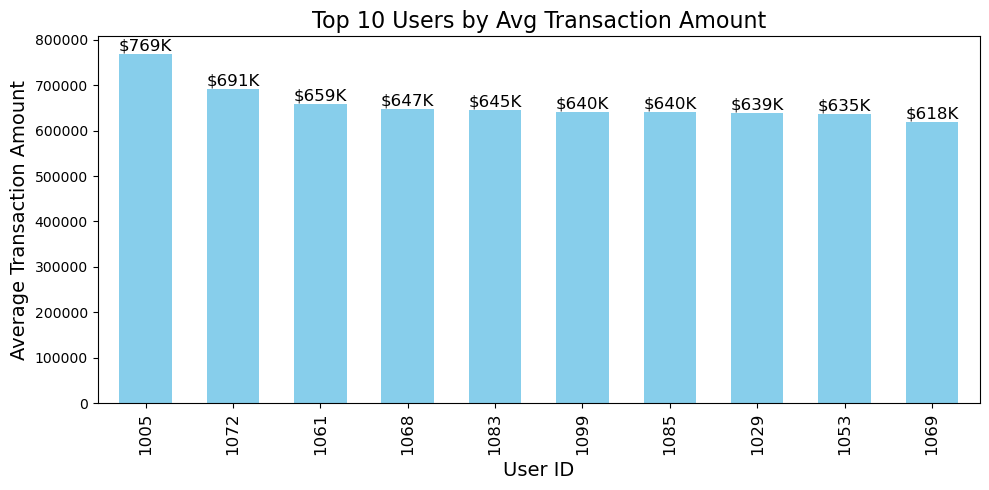

In [30]:
# Calculating AvgTransactionAmountPerUser
avg_transaction_amount_per_user = df.groupby('UserID')['TransactionAmount'].mean()

# Sorting and getting top 10 users
top_10_users = avg_transaction_amount_per_user.nlargest(10)

# Visualizing the top 10 users
plt.figure(figsize=(10, 5))  # Adjust the size of the figure

# Plotting top 10 users
top_10_users.plot(kind='bar', color='skyblue', width=0.6)
for i, value in enumerate(top_10_users):
    plt.text(i, value + 1000, f"${int(value/1000)}K", ha='center', va='bottom', fontsize=12)  # Adjust the fontsize
plt.title('Top 10 Users by Avg Transaction Amount', fontsize=16)  # Adjust the title fontsize
plt.xlabel('User ID', fontsize=14)  # Adjust the xlabel fontsize
plt.ylabel('Average Transaction Amount', fontsize=14)  # Adjust the ylabel fontsize
plt.xticks(fontsize=12)  # Adjust the xticks fontsize

plt.tight_layout()
plt.show()


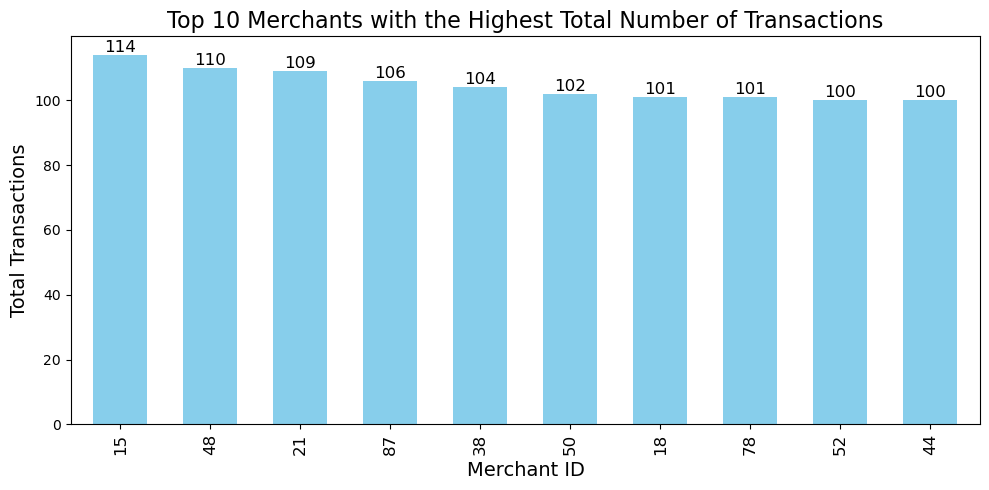

In [31]:
# Calculating TotalTransactionsPerMerchant
total_transactions_per_merchant = df['MerchantID'].value_counts()

# Get top 10 merchants
top_10_merchants = total_transactions_per_merchant.head(10)

# Visualizing the top 10 merchants with the highest total number of transactions
plt.figure(figsize=(10, 5))  # Adjust the size of the figure

# Plotting top 10 merchants
top_10_merchants.plot(kind='bar', color='skyblue', width=0.6)
for i, value in enumerate(top_10_merchants):
    plt.text(i, value, f"{value}", ha='center', va='bottom', fontsize=12)  # Adjust the fontsize and va
plt.title('Top 10 Merchants with the Highest Total Number of Transactions', fontsize=16)  # Adjust the title fontsize
plt.xlabel('Merchant ID', fontsize=14)  # Adjust the xlabel fontsize
plt.ylabel('Total Transactions', fontsize=14)  # Adjust the ylabel fontsize
plt.xticks(fontsize=12)  # Adjust the xticks fontsize

plt.tight_layout()
plt.show()


In [32]:
# Calculate average transaction frequency
avg_transaction_frequency = df['TransactionFrequency'].mean()

# Calculate average merchant frequency
avg_merchant_frequency = df['MerchantFrequency'].mean()

# Calculate TransactionFreqRatio
df['TransactionFreqRatio'] = df['TransactionFrequency'] / avg_transaction_frequency

# Calculate MerchantFreqRatio
df['MerchantFreqRatio'] = df['MerchantFrequency'] / avg_merchant_frequency

print(df.head(2))

   TransactionID  TransactionAmount  MerchantID  UserID     TransactionTime  \
0              1        374602.6648          43    1087 2023-01-01 00:00:00   
1              2        950719.2350           8    1011 2023-01-01 01:00:00   

   FraudIndicator TransactionType Location  TransactionFrequency  \
0               0          Online    Rural                     7   
1               0          Online    Rural                     3   

   MerchantFrequency  TransactionHour  TransactionFreqRatio  MerchantFreqRatio  
0                  1                0              1.400196           0.334335  
1                  0                1              0.600084           0.000000  


**TransactionFreqRatio** refers to a calculated metric that represents the normalized transaction frequency for each entry in the dataset. It is obtained by dividing the transaction frequency of each entry (the number of transactions associated with that entry) by the average transaction frequency across the entire dataset.
    This ratio provides a measure of how many times more or less frequent a particular entry's transactions are compared to the average transaction frequency. It allows for the comparison of transaction frequencies across different entries while accounting for variations in the overall dataset.
    
**MerchantFreqRatio** refers to a calculated metric that represents the normalized merchant frequency for each entry in the dataset. It is obtained by dividing the merchant frequency of each entry (the number of transactions associated with a particular merchant) by the average merchant frequency across the entire dataset.
    This ratio provides a measure of how many times more or less frequent a particular entry's transactions with a specific merchant are compared to the average merchant frequency. It allows for the comparison of merchant frequencies across different entries while accounting for variations in the overall dataset.
    


In [33]:
df.head()

,TransactionID,TransactionAmount,MerchantID,UserID,TransactionTime,FraudIndicator,TransactionType,Location,TransactionFrequency,MerchantFrequency,TransactionHour,TransactionFreqRatio,MerchantFreqRatio
0,1,374602.6648,43,1087,2023-01-01 00:00:00,0,Online,Rural,7,1,0,1.400196,0.334335
1,2,950719.2350,8,1011,2023-01-01 01:00:00,0,Online,Rural,3,0,1,0.600084,0.000000
2,3,732020.7424,13,1062,2023-01-01 02:00:00,0,In-store,Suburb,8,7,2,1.600224,2.340348
3,4,598698.6183,85,1084,2023-01-01 03:00:00,0,Online,City,10,3,3,2.000280,1.003006
4,5,156103.0386,92,1019,2023-01-01 04:00:00,0,In-store,City,8,3,4,1.600224,1.003006


<Figure size 1000x500 with 0 Axes>

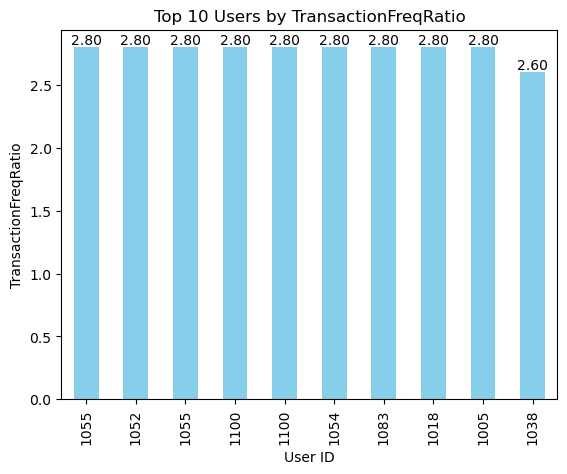

In [34]:
# Sorting the DataFrame by TransactionFreqRatio 
top_10_users = df.nlargest(10, 'TransactionFreqRatio')


# Visualizing the top 10 users
plt.figure(figsize=(10, 5))
top_10_users.plot(kind='bar', x='UserID', y='TransactionFreqRatio', color='skyblue',legend=None)
plt.title('Top 10 Users by TransactionFreqRatio')
plt.xlabel('User ID')
plt.ylabel('TransactionFreqRatio')


for index, value in enumerate(top_10_users['TransactionFreqRatio']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')



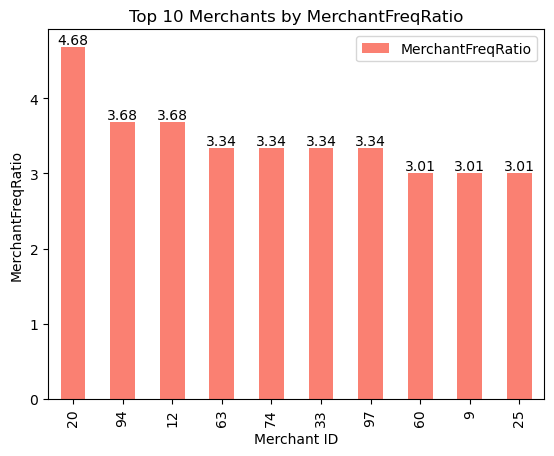

In [35]:
# Sorting the DataFrame by MerchantFreqRatio
top_10_merchants = df.nlargest(10, 'MerchantFreqRatio')

# Visualizing the top 10 merchants
top_10_merchants.plot(kind='bar', x='MerchantID', y='MerchantFreqRatio', color='salmon')
plt.title('Top 10 Merchants by MerchantFreqRatio')
plt.xlabel('Merchant ID')
plt.ylabel('MerchantFreqRatio')

for index, value in enumerate(top_10_merchants['MerchantFreqRatio']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

In [36]:
df

,TransactionID,TransactionAmount,MerchantID,UserID,TransactionTime,FraudIndicator,TransactionType,Location,TransactionFrequency,MerchantFrequency,TransactionHour,TransactionFreqRatio,MerchantFreqRatio
0,1,374602.6648,43,1087,2023-01-01 00:00:00,0,Online,Rural,7,1,0,1.400196,0.334335
1,2,950719.2350,8,1011,2023-01-01 01:00:00,0,Online,Rural,3,0,1,0.600084,0.000000
2,3,732020.7424,13,1062,2023-01-01 02:00:00,0,In-store,Suburb,8,7,2,1.600224,2.340348
3,4,598698.6183,85,1084,2023-01-01 03:00:00,0,Online,City,10,3,3,2.000280,1.003006
4,5,156103.0386,92,1019,2023-01-01 04:00:00,0,In-store,City,8,3,4,1.600224,1.003006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,8733,252144.6799,73,1015,2023-12-30 20:00:00,0,Online,Rural,8,3,20,1.600224,1.003006
8733,8734,454222.0534,48,1016,2023-12-30 21:00:00,0,Online,Rural,9,7,21,1.800252,2.340348
8734,8735,385920.8609,18,1056,2023-12-30 22:00:00,0,In-store,Rural,5,2,22,1.000140,0.668671
8735,8736,982079.1709,94,1066,2023-12-30 23:00:00,0,In-store,Rural,5,5,23,1.000140,1.671677


In [37]:
# Calculate NumPreviousFrauds for each user
user_fraud_counts = df[df['FraudIndicator'] == 1].groupby('UserID').size()
df['NumPreviousFrauds'] = df['UserID'].map(user_fraud_counts).fillna(0)

# Calculate NumPreviousFrauds for each merchant
merchant_fraud_counts = df[df['FraudIndicator'] == 1].groupby('MerchantID').size()
df['NumPreviousFraudsMerchant'] = df['MerchantID'].map(merchant_fraud_counts).fillna(0)

print(df.head(2))

   TransactionID  TransactionAmount  MerchantID  UserID     TransactionTime  \
0              1        374602.6648          43    1087 2023-01-01 00:00:00   
1              2        950719.2350           8    1011 2023-01-01 01:00:00   

   FraudIndicator TransactionType Location  TransactionFrequency  \
0               0          Online    Rural                     7   
1               0          Online    Rural                     3   

   MerchantFrequency  TransactionHour  TransactionFreqRatio  \
0                  1                0              1.400196   
1                  0                1              0.600084   

   MerchantFreqRatio  NumPreviousFrauds  NumPreviousFraudsMerchant  
0           0.334335                2.0                        1.0  
1           0.000000                3.0                        4.0  


Count of Frauds and Number of Users Allocated in Each Count:
1.0    2490
2.0    2104
3.0    1971
0.0    1542
5.0     274
4.0     182
Name: NumPreviousFrauds, dtype: int64


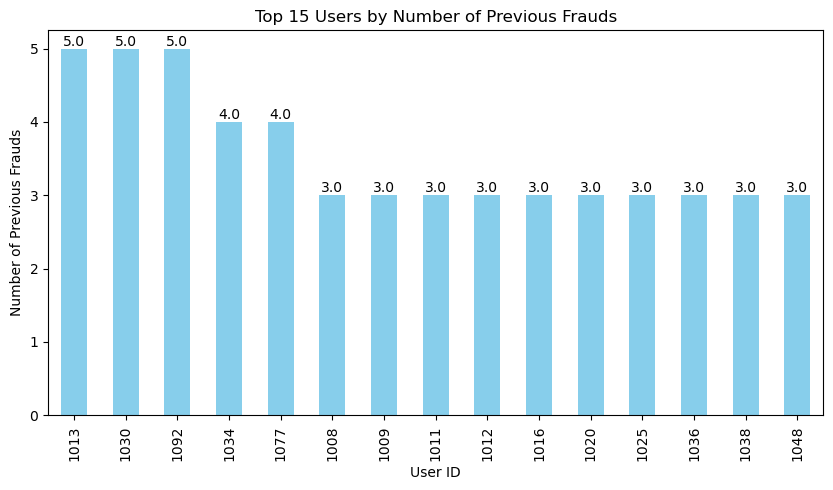

In [38]:
# Count of frauds and number of users allocated in each count
fraud_counts = df['NumPreviousFrauds'].value_counts()

print("Count of Frauds and Number of Users Allocated in Each Count:")
print(fraud_counts)

# Get top 15 users based on NumPreviousFrauds
top_15_users = df.groupby('UserID')['NumPreviousFrauds'].max().nlargest(15)

# Visualizing the top 15 users
plt.figure(figsize=(10, 5))  # Increased figure size
top_15_users_plot = top_15_users.plot(kind='bar', color='skyblue')
plt.title('Top 15 Users by Number of Previous Frauds')
plt.xlabel('User ID')
plt.ylabel('Number of Previous Frauds')

# Displaying values on each bar
for index, value in enumerate(top_15_users):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)  # Increased font size

plt.show()

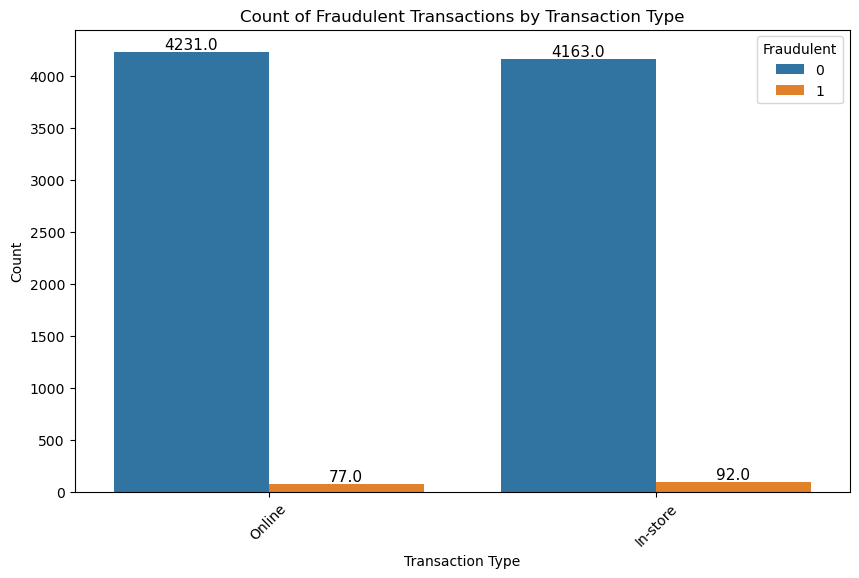

In [39]:
# Bivariate analysis: FraudIndicator vs TransactionType
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TransactionType', hue='FraudIndicator')
plt.title('Count of Fraudulent Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent', loc='upper right')

# Adding data values to the plot
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                        textcoords='offset points')

plt.show()

In [40]:
value = df['TransactionType'].value_counts()
print('The Count of CitizensType:')
print(value)
print("----------------------------------------------------")

The Count of CitizensType:
Online      4308
In-store    4255
Name: TransactionType, dtype: int64
----------------------------------------------------


In [41]:
# Calculate total counts and fraudulent counts for each transaction type
total_counts = df.groupby('TransactionType')['FraudIndicator'].count()
fraud_counts = df.groupby(['TransactionType', 'FraudIndicator']).size().unstack()[1]

# Calculate percentages of fraudulent transactions
fraud_percentage = round((fraud_counts / total_counts) * 100,2)

# Print the percentages
print("Percentage of Fraudulent Transactions:")
print("Online Transactions:", fraud_percentage['Online'])
print("In-store Transactions:", fraud_percentage['In-store'])


Percentage of Fraudulent Transactions:
Online Transactions: 1.79
In-store Transactions: 2.16


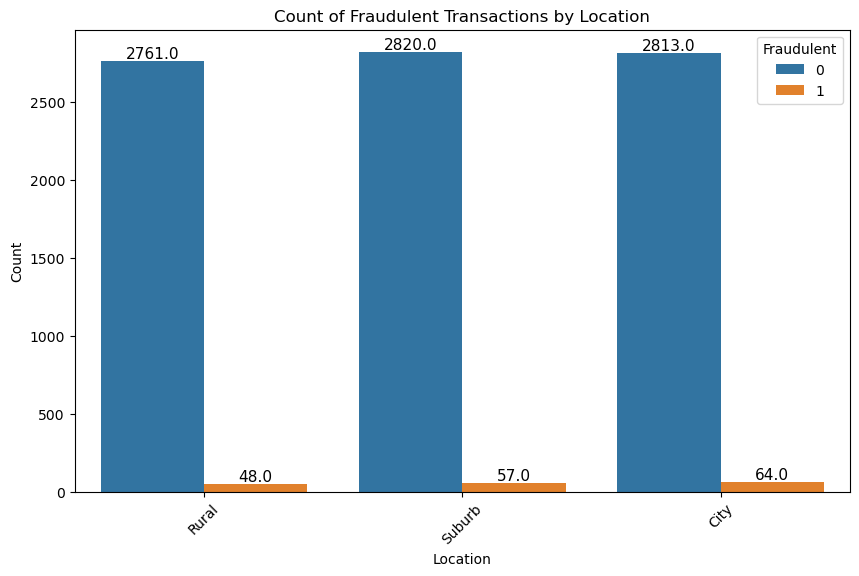

In [42]:
# Bivariate analysis: FraudIndicator vs Location
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location', hue='FraudIndicator')
plt.title('Count of Fraudulent Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent', loc='upper right')

# Adding data values to the plot
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                        textcoords='offset points')

plt.show()

In [43]:
# Calculate total counts and fraudulent counts for each location
total_counts_location = df.groupby('Location')['FraudIndicator'].count()
fraud_counts_location = df.groupby(['Location', 'FraudIndicator']).size().unstack()[1]

# Calculate percentages of fraudulent transactions
fraud_percentage_location = round((fraud_counts_location / total_counts_location) * 100,2)

# Print the percentages
print("Percentage of Fraudulent Transactions by Location:")
print("Rural Transactions:", fraud_percentage_location['Rural'])
print("Suburb Transactions:", fraud_percentage_location['Suburb'])
print("City Transactions:", fraud_percentage_location['City'])


Percentage of Fraudulent Transactions by Location:
Rural Transactions: 1.71
Suburb Transactions: 1.98
City Transactions: 2.22


In [44]:
df.corr()

,TransactionID,TransactionAmount,MerchantID,UserID,FraudIndicator,TransactionFrequency,MerchantFrequency,TransactionHour,TransactionFreqRatio,MerchantFreqRatio,NumPreviousFrauds,NumPreviousFraudsMerchant
TransactionID,1.000000,-0.021327,-0.006980,-0.020918,-0.010807,-0.020148,0.004238,0.001737,-0.020148,0.004238,-0.014605,0.004325
TransactionAmount,-0.021327,1.000000,0.020598,0.000908,0.001224,0.005272,-0.008168,0.006518,0.005272,-0.008168,-0.004478,0.011423
MerchantID,-0.006980,0.020598,1.000000,0.002330,-0.013378,-0.002989,0.006389,0.011081,-0.002989,0.006389,-0.016120,-0.131521
UserID,-0.020918,0.000908,0.002330,1.000000,0.001022,-0.039615,0.014687,0.010524,-0.039615,0.014687,-0.003109,0.002087
FraudIndicator,-0.010807,0.001224,-0.013378,0.001022,1.000000,0.003068,0.010918,0.000374,0.003068,0.010918,0.098073,0.110447
TransactionFrequency,-0.020148,0.005272,-0.002989,-0.039615,0.003068,1.000000,0.008921,0.002205,1.000000,0.008921,-0.000708,-0.001205
MerchantFrequency,0.004238,-0.008168,0.006389,0.014687,0.010918,0.008921,1.000000,0.001576,0.008921,1.000000,0.004914,-0.008156
TransactionHour,0.001737,0.006518,0.011081,0.010524,0.000374,0.002205,0.001576,1.000000,0.002205,0.001576,0.009356,-0.010506
TransactionFreqRatio,-0.020148,0.005272,-0.002989,-0.039615,0.003068,1.000000,0.008921,0.002205,1.000000,0.008921,-0.000708,-0.001205
MerchantFreqRatio,0.004238,-0.008168,0.006389,0.014687,0.010918,0.008921,1.000000,0.001576,0.008921,1.000000,0.004914,-0.008156


<AxesSubplot: >

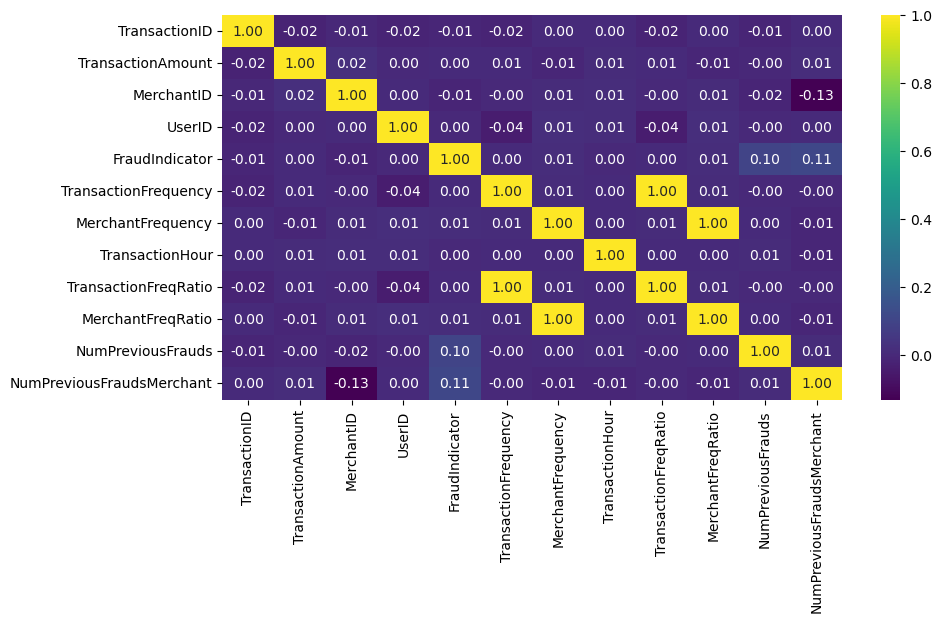

In [45]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="viridis")

##### insight:
- The strong relationships observed in the correlation matrix between features of the dataset may provide valuable insights into their interdependencies. While such correlations can be indicative of potential predictive power, it's essential to consider various factors beyond correlation alone, including feature relevance, model complexity, and data noise, to accurately assess and enhance predictive performance and metrics.

In [46]:
#The pair plot allows the inspectation of the relationships between different pairs of variables in the dataset. 
#sns.pairplot(df)

# Machine Learning

In [47]:
df.head(2)

,TransactionID,TransactionAmount,MerchantID,UserID,TransactionTime,FraudIndicator,TransactionType,Location,TransactionFrequency,MerchantFrequency,TransactionHour,TransactionFreqRatio,MerchantFreqRatio,NumPreviousFrauds,NumPreviousFraudsMerchant
0,1,374602.6648,43,1087,2023-01-01 00:00:00,0,Online,Rural,7,1,0,1.400196,0.334335,2.0,1.0
1,2,950719.2350,8,1011,2023-01-01 01:00:00,0,Online,Rural,3,0,1,0.600084,0.000000,3.0,4.0


In [48]:
df.columns

Index(['TransactionID', 'TransactionAmount', 'MerchantID', 'UserID',
       'TransactionTime', 'FraudIndicator', 'TransactionType', 'Location',
       'TransactionFrequency', 'MerchantFrequency', 'TransactionHour',
       'TransactionFreqRatio', 'MerchantFreqRatio', 'NumPreviousFrauds',
       'NumPreviousFraudsMerchant'],
      dtype='object')

###### Dropping of 'TransactionID', 'MerchantID','UserID' and 'TransactionTime' are for these certain reasons:
- **Uniqueness and Irrelevance**
- **Data Leakage**
- **Dimensionality Reduction**
- **Model Interpretability**

In [49]:
df.drop('TransactionID', axis=1, inplace=True)
df.drop('MerchantID', axis=1, inplace=True)
df.drop('UserID', axis=1, inplace=True)
df.drop('TransactionTime', axis=1, inplace=True)

In [50]:
df.columns

Index(['TransactionAmount', 'FraudIndicator', 'TransactionType', 'Location',
       'TransactionFrequency', 'MerchantFrequency', 'TransactionHour',
       'TransactionFreqRatio', 'MerchantFreqRatio', 'NumPreviousFrauds',
       'NumPreviousFraudsMerchant'],
      dtype='object')

In [51]:
features = df.drop('FraudIndicator', axis=1)
label = df['FraudIndicator']

In [52]:
label.head(2)

0    0
1    0
Name: FraudIndicator, dtype: int64

In [53]:
features.head(2)

,TransactionAmount,TransactionType,Location,TransactionFrequency,MerchantFrequency,TransactionHour,TransactionFreqRatio,MerchantFreqRatio,NumPreviousFrauds,NumPreviousFraudsMerchant
0,374602.6648,Online,Rural,7,1,0,1.400196,0.334335,2.0,1.0
1,950719.2350,Online,Rural,3,0,1,0.600084,0.000000,3.0,4.0


##### get dummies was use to encode the categorical variable since it is a nominal categorical variables

In [54]:
#Encoding the dataset
features = pd.get_dummies(features, columns=['TransactionType', 'Location'])

In [55]:
features.head(4)

,TransactionAmount,TransactionFrequency,MerchantFrequency,TransactionHour,TransactionFreqRatio,MerchantFreqRatio,NumPreviousFrauds,NumPreviousFraudsMerchant,TransactionType_In-store,TransactionType_Online,Location_City,Location_Rural,Location_Suburb
0,374602.6648,7,1,0,1.400196,0.334335,2.0,1.0,0,1,0,1,0
1,950719.2350,3,0,1,0.600084,0.000000,3.0,4.0,0,1,0,1,0
2,732020.7424,8,7,2,1.600224,2.340348,3.0,0.0,1,0,0,0,1
3,598698.6183,10,3,3,2.000280,1.003006,1.0,4.0,0,1,1,0,0


In [56]:
features.head()

,TransactionAmount,TransactionFrequency,MerchantFrequency,TransactionHour,TransactionFreqRatio,MerchantFreqRatio,NumPreviousFrauds,NumPreviousFraudsMerchant,TransactionType_In-store,TransactionType_Online,Location_City,Location_Rural,Location_Suburb
0,374602.6648,7,1,0,1.400196,0.334335,2.0,1.0,0,1,0,1,0
1,950719.2350,3,0,1,0.600084,0.000000,3.0,4.0,0,1,0,1,0
2,732020.7424,8,7,2,1.600224,2.340348,3.0,0.0,1,0,0,0,1
3,598698.6183,10,3,3,2.000280,1.003006,1.0,4.0,0,1,1,0,0
4,156103.0386,8,3,4,1.600224,1.003006,0.0,2.0,1,0,1,0,0


##### Robust Scaler was used because it functions well with datasets with outliers

In [57]:
from sklearn.preprocessing import RobustScaler
# Initialize the RobustScaler
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(features),columns = features.columns)
df_scaled.head(2)

,TransactionAmount,TransactionFrequency,MerchantFrequency,TransactionHour,TransactionFreqRatio,MerchantFreqRatio,NumPreviousFrauds,NumPreviousFraudsMerchant,TransactionType_In-store,TransactionType_Online,Location_City,Location_Rural,Location_Suburb
0,-0.241373,0.666667,-1.0,-1.000000,0.666667,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.901205,-0.666667,-1.5,-0.916667,-0.666667,-1.5,0.5,1.5,0.0,0.0,0.0,1.0,0.0


##### By using "stratify=Y," you ensure that both the train and test sets have the same distribution of classes as the original dataset, which is particularly important when dealing with imbalanced datasets or when class distribution is critical for the task at hand.

##### By using "stratify", you build a pipeline that's robust to changes in class distribution, ensuring that your model's performance evaluation remains reliable even if the dataset characteristics change over time.

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size=0.2, stratify=label, random_state=2)

In [59]:
from collections import Counter
print("Class distribution before SMOTE:", Counter(label))

Class distribution before SMOTE: Counter({0: 8394, 1: 169})


In [60]:
#Synthetic Minority Oversampling Technique is used in addressing imbalanced datasets to oversample the minority class
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, label = oversample.fit_resample(features, label)

In [61]:
print("Class distribution after SMOTE:", Counter(label))

Class distribution after SMOTE: Counter({0: 8394, 1: 8394})


In [62]:
X_train.shape,X_test.shape

((6850, 13), (1713, 13))

In [67]:
#importing predictive models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [64]:
#Next, we will create a selection of classifiers and use the best one for our final output. 
#The predictors that will be used are XGBoost, Random Forest,Logistic Regression, K Nearest Neighbours, and SGD Classifier.

classifiers = [[XGBClassifier(),'XGB Classifier'], [RandomForestClassifier(),'Random Forest'], [LogisticRegression(),'Logistic Regression'],
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(),'SGD Classifier']]

In [68]:
score_list = []
cross_val_list = []
roc_auc_list = []

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, Y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)

    score = model.score(X_test, Y_test)
    cross_val = cross_val_score(model, X_test, Y_test).mean()
    roc_auc = roc_auc_score(Y_test, pred)
    
    score_list.append(score)
    cross_val_list.append(cross_val)
    roc_auc_list.append(roc_auc)
    
    print(model_name, 'model score:     ' + str(round(score*100, 2)) + '%')
    print(model_name, 'cross val score: ' +str(round(cross_val*100, 2)) + '%')
    print(model_name, 'roc auc score:   ' + str(round(roc_auc*100, 2)) + '%')
    
    if model_name != classifiers[-1][1]:
        print('')

XGB Classifier model score:     97.84%
XGB Classifier cross val score: 97.66%
XGB Classifier roc auc score:   49.91%

Random Forest model score:     98.02%
Random Forest cross val score: 98.07%
Random Forest roc auc score:   50.0%

Logistic Regression model score:     98.02%
Logistic Regression cross val score: 98.02%
Logistic Regression roc auc score:   50.0%

K-Nearest Neighbours model score:     98.02%
K-Nearest Neighbours cross val score: 97.9%
K-Nearest Neighbours roc auc score:   50.0%

SGD Classifier model score:     98.02%
SGD Classifier cross val score: 78.83%
SGD Classifier roc auc score:   50.0%


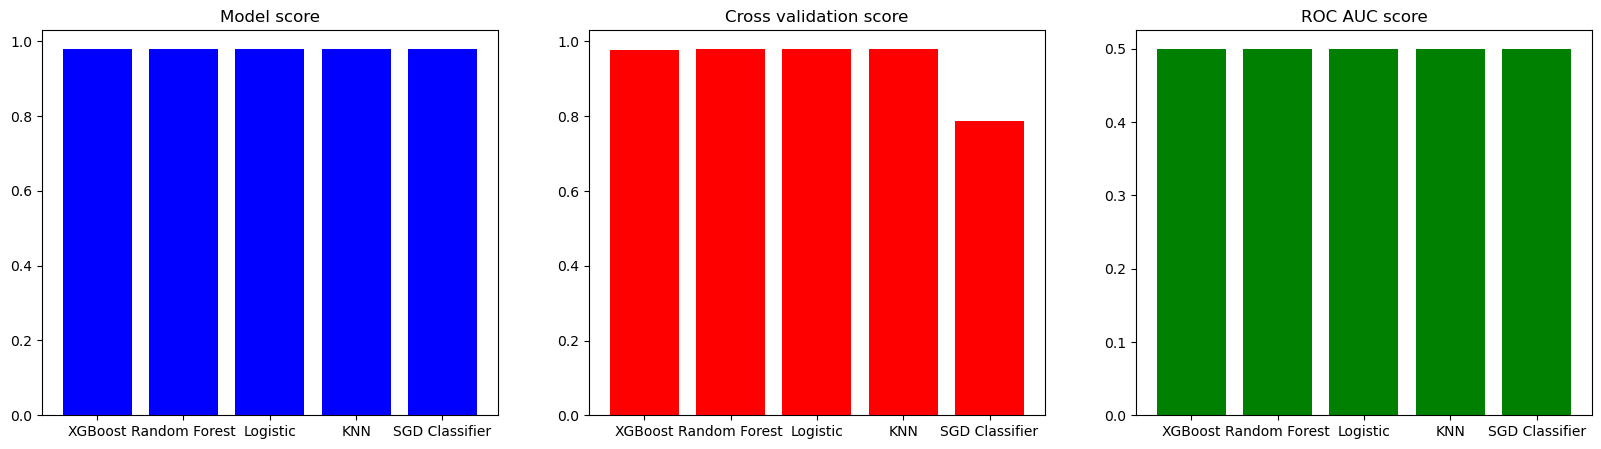

In [76]:
labels = ['XGBoost', 'Random Forest', 'Logistic', 'KNN', 'SGD Classifier']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.bar(labels, score_list, color='blue')
ax2.bar(labels, cross_val_list, color='red')
ax3.bar(labels, roc_auc_list, color='green')

ax1.set_title('Model score')
ax2.set_title('Cross validation score')
ax3.set_title('ROC AUC score')

plt.show()

In [77]:
model = LogisticRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)

score = model.score(X_test, Y_test)
cross_val = cross_val_score(model, X_test, Y_test).mean()
roc_auc = roc_auc_score(Y_test, pred)

print('model score:     ' + str(round(score*100, 2)) + '%')
print('cross val score: ' +str(round(cross_val*100, 2)) + '%')
print('roc auc score:   ' + str(round(roc_auc*100, 2)) + '%')

model score:     98.02%
cross val score: 98.02%
roc auc score:   50.0%
